In [1]:
import os
import random
from tqdm.notebook import tqdm

import numpy as np
import pandas as pd


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt

ROOT_DIR = "./data"
RANDOM_SEED = 110

## Dam

In [2]:
df = pd.read_csv("../data/pre_1.csv", header=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40506 entries, 0 to 40505
Columns: 156 entries, Equipment_Dam to Workorder Category
dtypes: float64(72), int64(76), object(8)
memory usage: 48.2+ MB


In [3]:
Dam_df = df.loc[:, df.columns.str.contains("_Dam")]
Dam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40506 entries, 0 to 40505
Data columns (total 70 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Equipment_Dam                                             40506 non-null  int64  
 1   CURE END POSITION X Collect Result_Dam                    40506 non-null  float64
 2   CURE END POSITION Z Collect Result_Dam                    40506 non-null  float64
 3   CURE END POSITION Θ Collect Result_Dam                    40506 non-null  int64  
 4   CURE SPEED Collect Result_Dam                             40506 non-null  int64  
 5   CURE STANDBY POSITION X Collect Result_Dam                40506 non-null  int64  
 6   CURE STANDBY POSITION Z Collect Result_Dam                40506 non-null  float64
 7   CURE STANDBY POSITION Θ Collect Result_Dam                40506 non-null  int64  
 8   CURE START POSIT

1. Circle/Line

In [6]:
CL_df = Dam_df.iloc[:, 42:69]

CL_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40506 entries, 0 to 40505
Data columns (total 27 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Stage1 Circle1 Distance Speed Collect Result_Dam  40506 non-null  int64  
 1   Stage1 Circle2 Distance Speed Collect Result_Dam  40506 non-null  int64  
 2   Stage1 Circle3 Distance Speed Collect Result_Dam  40506 non-null  int64  
 3   Stage1 Circle4 Distance Speed Collect Result_Dam  40506 non-null  int64  
 4   Stage1 Line1 Distance Speed Collect Result_Dam    40506 non-null  int64  
 5   Stage1 Line2 Distance Speed Collect Result_Dam    40506 non-null  int64  
 6   Stage1 Line3 Distance Speed Collect Result_Dam    40506 non-null  int64  
 7   Stage1 Line4 Distance Speed Collect Result_Dam    40506 non-null  int64  
 8   Stage2 Circle1 Distance Speed Collect Result_Dam  40506 non-null  int64  
 9   Stage2 Circle2 Di

In [8]:
# 아래 결과를 보면 grouping은 아닌 것 같아..!

CL_df.value_counts()

Stage1 Circle1 Distance Speed Collect Result_Dam  Stage1 Circle2 Distance Speed Collect Result_Dam  Stage1 Circle3 Distance Speed Collect Result_Dam  Stage1 Circle4 Distance Speed Collect Result_Dam  Stage1 Line1 Distance Speed Collect Result_Dam  Stage1 Line2 Distance Speed Collect Result_Dam  Stage1 Line3 Distance Speed Collect Result_Dam  Stage1 Line4 Distance Speed Collect Result_Dam  Stage2 Circle1 Distance Speed Collect Result_Dam  Stage2 Circle2 Distance Speed Collect Result_Dam  Stage2 Circle3 Distance Speed Collect Result_Dam  Stage2 Circle4 Distance Speed Collect Result_Dam  Stage2 Line1 Distance Speed Collect Result_Dam  Stage2 Line2 Distance Speed Collect Result_Dam  Stage2 Line3 Distance Speed Collect Result_Dam  Stage2 Line4 Distance Speed Collect Result_Dam  Stage3 Circle1 Distance Speed Collect Result_Dam  Stage3 Circle2 Distance Speed Collect Result_Dam  Stage3 Circle3 Distance Speed Collect Result_Dam  Stage3 Circle4 Distance Speed Collect Result_Dam  Stage3 Line1 Dis

<Stage 별 시각화>
- circle: 1 제외하고 분포 비슷
- line: 특이점 X

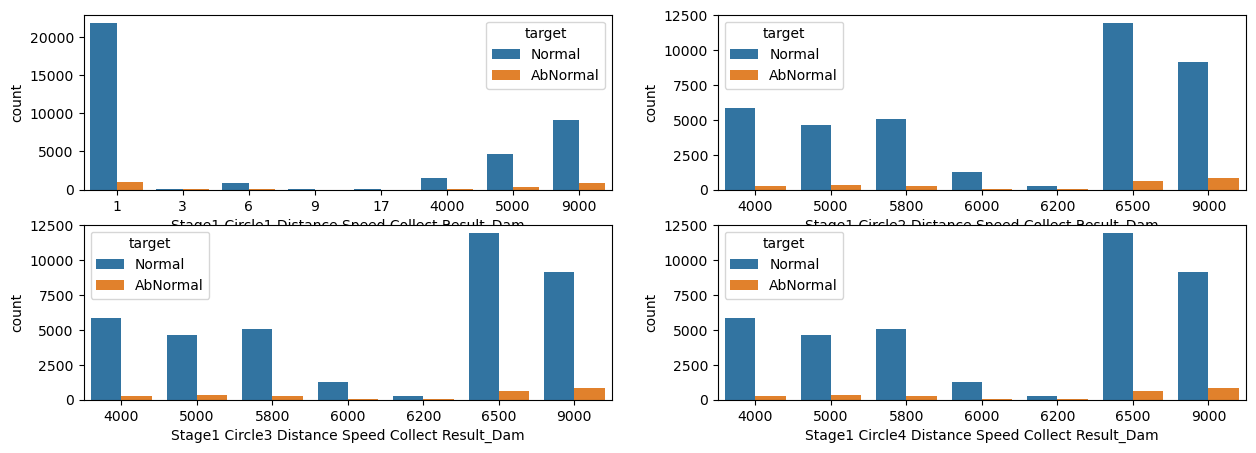

In [11]:
# Stage 1, Circle 시각화
# circle 1 제외하고 분포 비슷

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 5))

sns.countplot(x="Stage1 Circle1 Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[0, 0]);
sns.countplot(x="Stage1 Circle2 Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[0, 1]);
sns.countplot(x="Stage1 Circle3 Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[1, 0]);
sns.countplot(x="Stage1 Circle4 Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[1,1]);

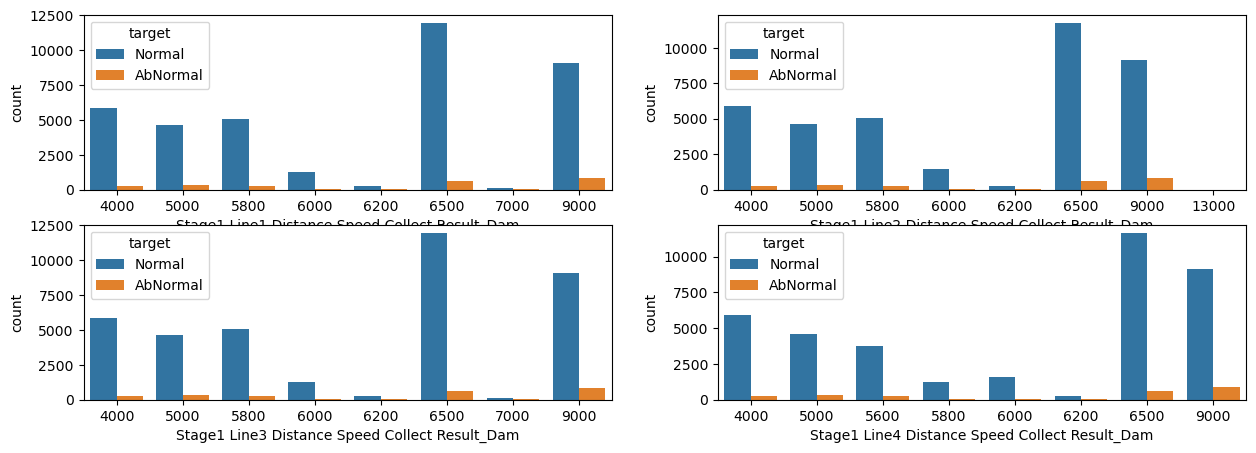

In [12]:
# Stage 1, Line 시각화
# 특이점 X

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 5))

sns.countplot(x="Stage1 Line1 Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[0, 0]);
sns.countplot(x="Stage1 Line2 Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[0, 1]);
sns.countplot(x="Stage1 Line3 Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[1, 0]);
sns.countplot(x="Stage1 Line4 Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[1,1]);

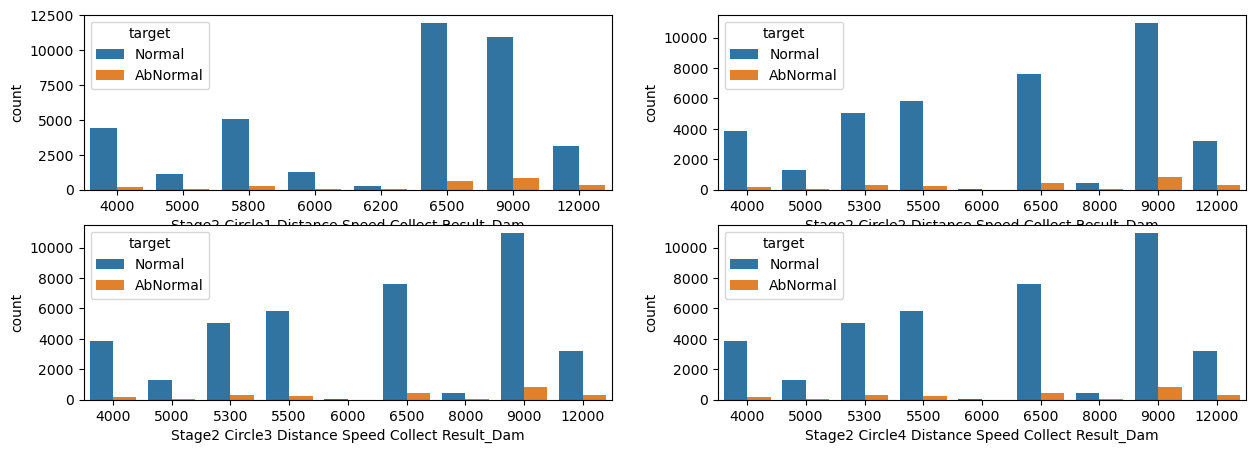

In [13]:
# Stage 2, Circle 시각화
# circle 1 제외하고 분포 비슷

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 5))

sns.countplot(x="Stage2 Circle1 Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[0, 0]);
sns.countplot(x="Stage2 Circle2 Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[0, 1]);
sns.countplot(x="Stage2 Circle3 Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[1, 0]);
sns.countplot(x="Stage2 Circle4 Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[1,1]);

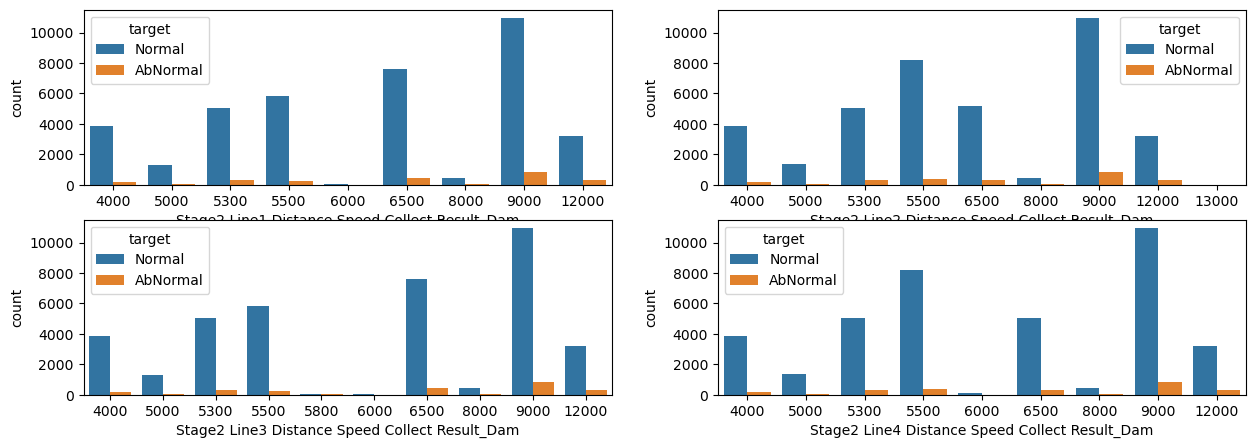

In [15]:
# Stage 2, Line 시각화
# 1/3 , 2/4끼리 분포 비슷 => but 범주 개수가 다름

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 5))

sns.countplot(x="Stage2 Line1 Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[0, 0]);
sns.countplot(x="Stage2 Line2 Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[0, 1]);
sns.countplot(x="Stage2 Line3 Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[1, 0]);
sns.countplot(x="Stage2 Line4 Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[1,1]);

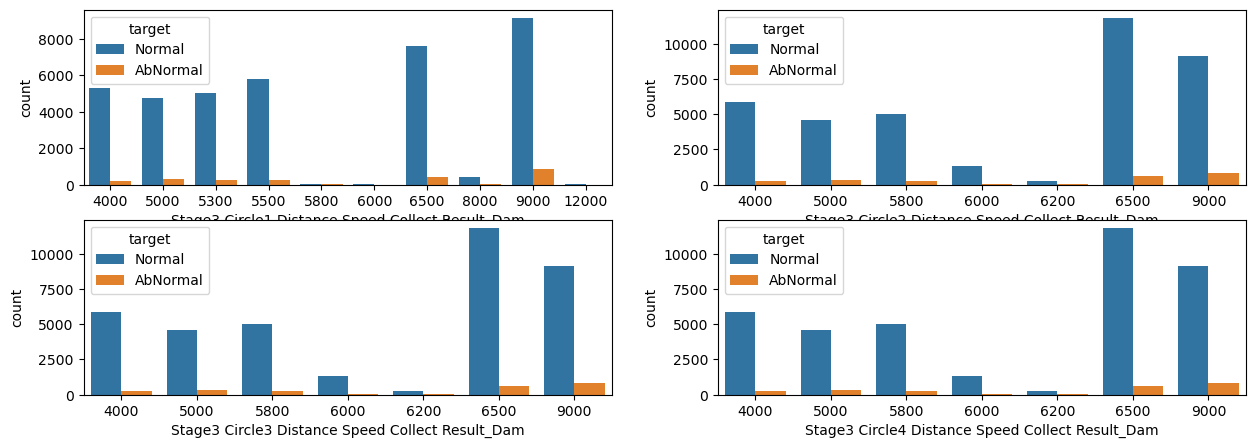

In [14]:
# Stage 3, Circle 시각화
# circle 1 제외하고 분포 비슷

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 5))

sns.countplot(x="Stage3 Circle1 Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[0, 0]);
sns.countplot(x="Stage3 Circle2 Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[0, 1]);
sns.countplot(x="Stage3 Circle3 Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[1, 0]);
sns.countplot(x="Stage3 Circle4 Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[1,1]);

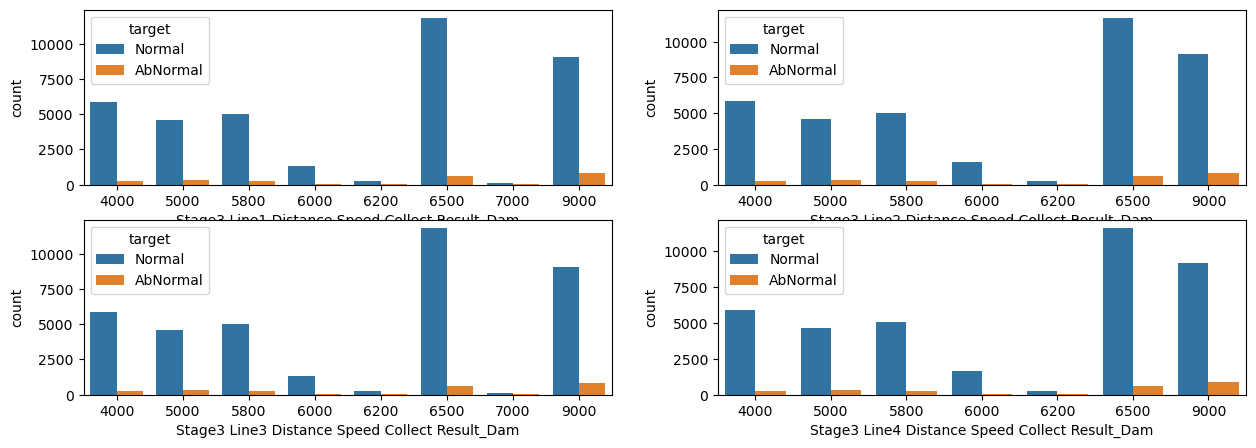

In [16]:
# Stage 3, Line 시각화
# 1/3 , 2/4끼리 분포 비슷

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 5))

sns.countplot(x="Stage3 Line1 Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[0, 0]);
sns.countplot(x="Stage3 Line2 Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[0, 1]);
sns.countplot(x="Stage3 Line3 Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[1, 0]);
sns.countplot(x="Stage3 Line4 Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[1,1]);

<Circle, line별 시각화>
- Stage별 상관성이 circle별 상관성보다 높은 듯 (circle 1 제외)

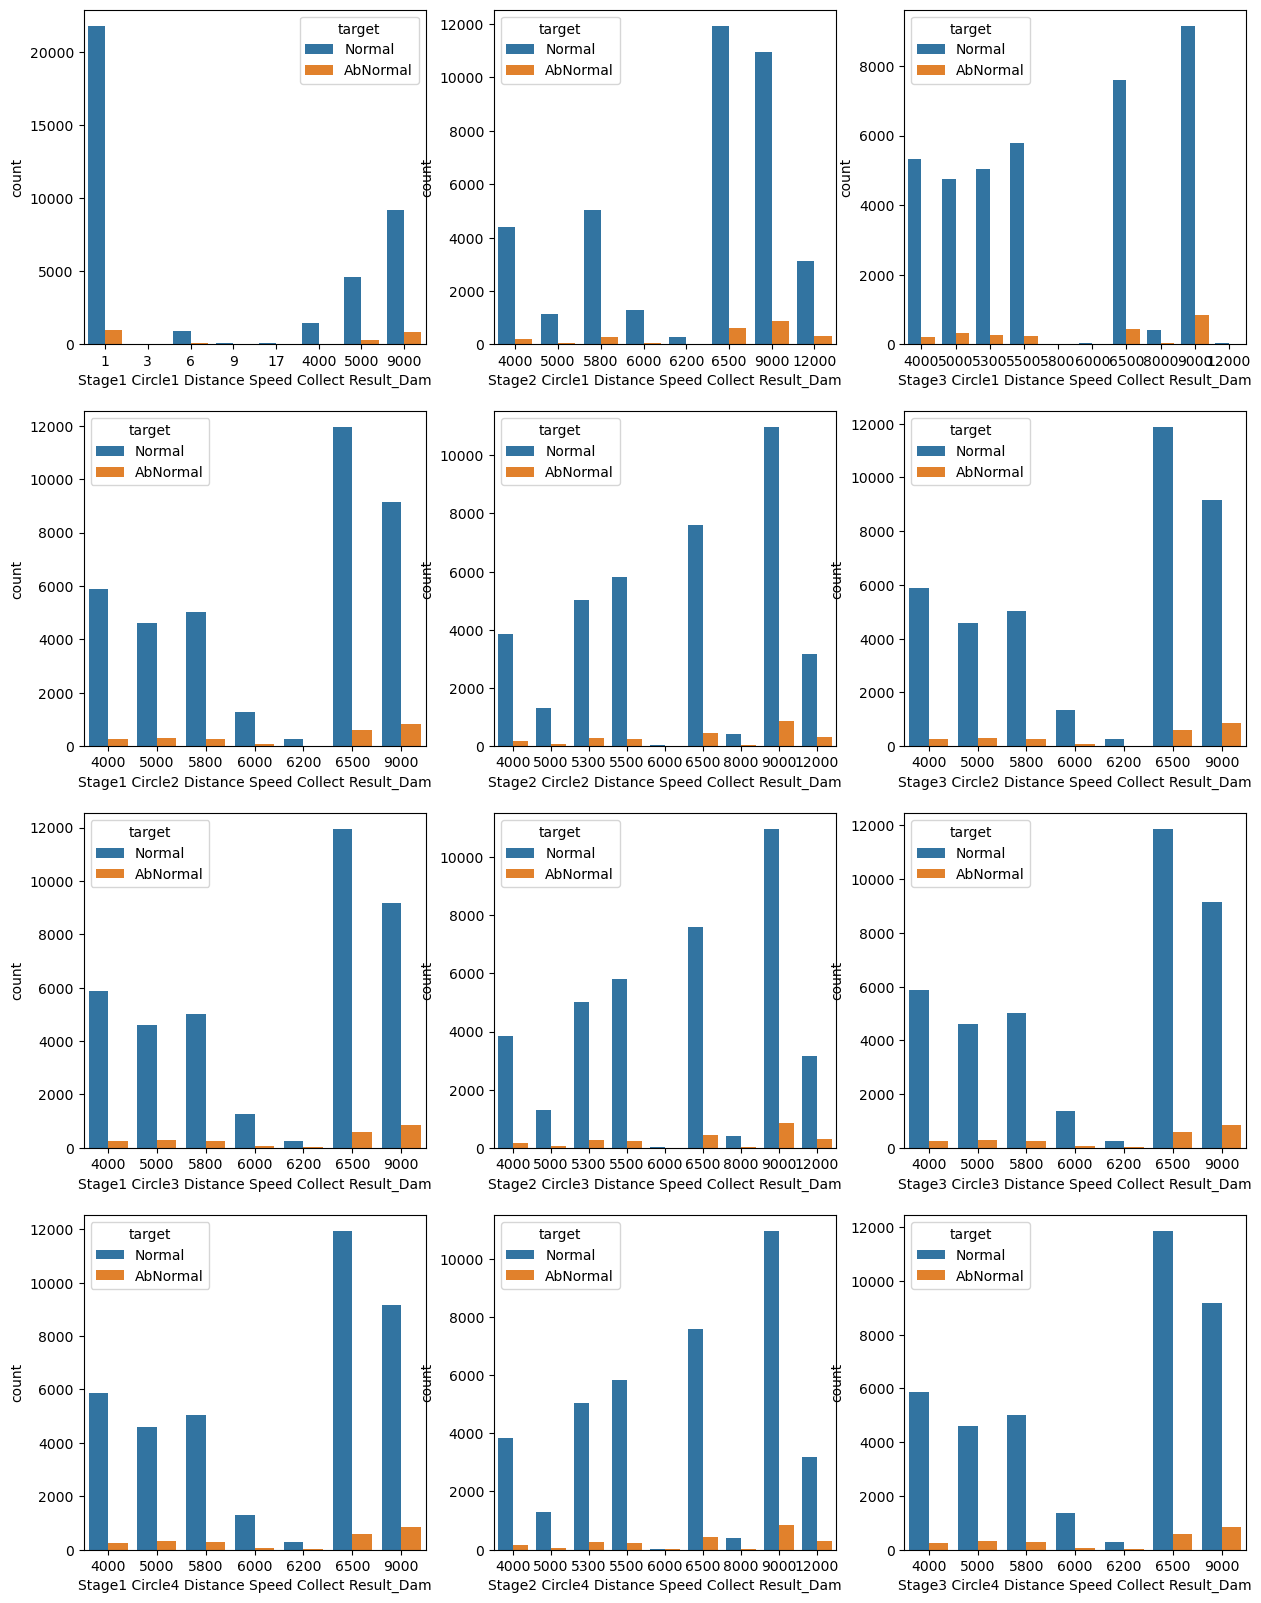

In [20]:
#Circle 1,2,3,4

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 20))

sns.countplot(x="Stage1 Circle1 Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[0, 0]);
sns.countplot(x="Stage2 Circle1 Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[0, 1]);
sns.countplot(x="Stage3 Circle1 Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[0, 2]);

sns.countplot(x="Stage1 Circle2 Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[1, 0]);
sns.countplot(x="Stage2 Circle2 Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[1, 1]);
sns.countplot(x="Stage3 Circle2 Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[1, 2]);

sns.countplot(x="Stage1 Circle3 Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[2, 0]);
sns.countplot(x="Stage2 Circle3 Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[2, 1]);
sns.countplot(x="Stage3 Circle3 Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[2, 2]);

sns.countplot(x="Stage1 Circle4 Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[3, 0]);
sns.countplot(x="Stage2 Circle4 Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[3, 1]);
sns.countplot(x="Stage3 Circle4 Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[3, 2]);

In [21]:
# stage별 상관성

CL_df.corr()

,Stage1 Circle1 Distance Speed Collect Result_Dam,Stage1 Circle2 Distance Speed Collect Result_Dam,Stage1 Circle3 Distance Speed Collect Result_Dam,Stage1 Circle4 Distance Speed Collect Result_Dam,Stage1 Line1 Distance Speed Collect Result_Dam,Stage1 Line2 Distance Speed Collect Result_Dam,Stage1 Line3 Distance Speed Collect Result_Dam,Stage1 Line4 Distance Speed Collect Result_Dam,Stage2 Circle1 Distance Speed Collect Result_Dam,Stage2 Circle2 Distance Speed Collect Result_Dam,...,Stage3 Circle2 Distance Speed Collect Result_Dam,Stage3 Circle3 Distance Speed Collect Result_Dam,Stage3 Circle4 Distance Speed Collect Result_Dam,Stage3 Line1 Distance Speed Collect Result_Dam,Stage3 Line2 Distance Speed Collect Result_Dam,Stage3 Line3 Distance Speed Collect Result_Dam,Stage3 Line4 Distance Speed Collect Result_Dam,THICKNESS 1 Collect Result_Dam,THICKNESS 2 Collect Result_Dam,THICKNESS 3 Collect Result_Dam
Stage1 Circle1 Distance Speed Collect Result_Dam,1.000000,0.684839,0.684839,0.684839,0.681929,0.685668,0.681929,0.691908,0.844805,0.857048,...,0.685251,0.685251,0.685251,0.682344,0.686283,0.682344,0.686751,-0.909824,0.137512,0.189998
Stage1 Circle2 Distance Speed Collect Result_Dam,0.684839,1.000000,1.000000,1.000000,0.998157,0.999597,0.998157,0.999099,0.717162,0.667348,...,0.999912,0.999912,0.999912,0.998070,0.999694,0.998070,0.999596,-0.320727,0.042615,0.064431
Stage1 Circle3 Distance Speed Collect Result_Dam,0.684839,1.000000,1.000000,1.000000,0.998157,0.999597,0.998157,0.999099,0.717162,0.667348,...,0.999912,0.999912,0.999912,0.998070,0.999694,0.998070,0.999596,-0.320727,0.042615,0.064431
Stage1 Circle4 Distance Speed Collect Result_Dam,0.684839,1.000000,1.000000,1.000000,0.998157,0.999597,0.998157,0.999099,0.717162,0.667348,...,0.999912,0.999912,0.999912,0.998070,0.999694,0.998070,0.999596,-0.320727,0.042615,0.064431
Stage1 Line1 Distance Speed Collect Result_Dam,0.681929,0.998157,0.998157,0.998157,1.000000,0.997750,1.000000,0.997235,0.712378,0.662523,...,0.998067,0.998067,0.998067,0.999911,0.997844,0.999911,0.997744,-0.317995,0.042185,0.063853
Stage1 Line2 Distance Speed Collect Result_Dam,0.685668,0.999597,0.999597,0.999597,0.997750,1.000000,0.997750,0.998677,0.717390,0.668141,...,0.999508,0.999508,0.999508,0.997663,0.999728,0.997663,0.999189,-0.322034,0.044296,0.066314
Stage1 Line3 Distance Speed Collect Result_Dam,0.681929,0.998157,0.998157,0.998157,1.000000,0.997750,1.000000,0.997235,0.712378,0.662523,...,0.998067,0.998067,0.998067,0.999911,0.997844,0.999911,0.997744,-0.317995,0.042185,0.063853
Stage1 Line4 Distance Speed Collect Result_Dam,0.691908,0.999099,0.999099,0.999099,0.997235,0.998677,0.997235,1.000000,0.721970,0.674702,...,0.999002,0.999002,0.999002,0.997140,0.998764,0.997140,0.999294,-0.330440,0.052982,0.073688
Stage2 Circle1 Distance Speed Collect Result_Dam,0.844805,0.717162,0.717162,0.717162,0.712378,0.717390,0.712378,0.721970,1.000000,0.965648,...,0.717320,0.717320,0.717320,0.712539,0.717716,0.712539,0.717897,-0.689759,0.099702,0.142091
Stage2 Circle2 Distance Speed Collect Result_Dam,0.857048,0.667348,0.667348,0.667348,0.662523,0.668141,0.662523,0.674702,0.965648,1.000000,...,0.667726,0.667726,0.667726,0.662903,0.668670,0.662903,0.669100,-0.733943,0.131602,0.184040


In [24]:
# stage 2,3,4 grouping 가능 여부 확인

CL_df[["Stage1 Circle2 Distance Speed Collect Result_Dam", "Stage1 Circle3 Distance Speed Collect Result_Dam", "Stage1 Circle4 Distance Speed Collect Result_Dam"]].value_counts()

Stage1 Circle2 Distance Speed Collect Result_Dam  Stage1 Circle3 Distance Speed Collect Result_Dam  Stage1 Circle4 Distance Speed Collect Result_Dam
6500                                              6500                                              6500                                                12539
9000                                              9000                                              9000                                                10007
4000                                              4000                                              4000                                                 6138
5800                                              5800                                              5800                                                 5295
5000                                              5000                                              5000                                                 4901
6000                                              6000       

In [25]:
# circle 1 들어가면 grouping 불가

CL_df[["Stage1 Circle1 Distance Speed Collect Result_Dam", "Stage1 Circle2 Distance Speed Collect Result_Dam", "Stage1 Circle3 Distance Speed Collect Result_Dam", "Stage1 Circle4 Distance Speed Collect Result_Dam"]].value_counts()

Stage1 Circle1 Distance Speed Collect Result_Dam  Stage1 Circle2 Distance Speed Collect Result_Dam  Stage1 Circle3 Distance Speed Collect Result_Dam  Stage1 Circle4 Distance Speed Collect Result_Dam
1                                                 6500                                              6500                                              6500                                                12008
9000                                              9000                                              9000                                              9000                                                10007
1                                                 5800                                              5800                                              5800                                                 4975
5000                                              5000                                              5000                                              5000                       

In [26]:
# 모든 stage circle 2,3,4 grouping 가능?

CL_df[["Stage1 Circle2 Distance Speed Collect Result_Dam", "Stage1 Circle3 Distance Speed Collect Result_Dam", "Stage1 Circle4 Distance Speed Collect Result_Dam", "Stage2 Circle2 Distance Speed Collect Result_Dam", "Stage2 Circle3 Distance Speed Collect Result_Dam", "Stage2 Circle4 Distance Speed Collect Result_Dam", "Stage3 Circle2 Distance Speed Collect Result_Dam", "Stage3 Circle3 Distance Speed Collect Result_Dam", "Stage3 Circle4 Distance Speed Collect Result_Dam"]].value_counts()

Stage1 Circle2 Distance Speed Collect Result_Dam  Stage1 Circle3 Distance Speed Collect Result_Dam  Stage1 Circle4 Distance Speed Collect Result_Dam  Stage2 Circle2 Distance Speed Collect Result_Dam  Stage2 Circle3 Distance Speed Collect Result_Dam  Stage2 Circle4 Distance Speed Collect Result_Dam  Stage3 Circle2 Distance Speed Collect Result_Dam  Stage3 Circle3 Distance Speed Collect Result_Dam  Stage3 Circle4 Distance Speed Collect Result_Dam
6500                                              6500                                              6500                                              6500                                              6500                                              6500                                              6500                                              6500                                              6500                                                8033
9000                                              9000                                        

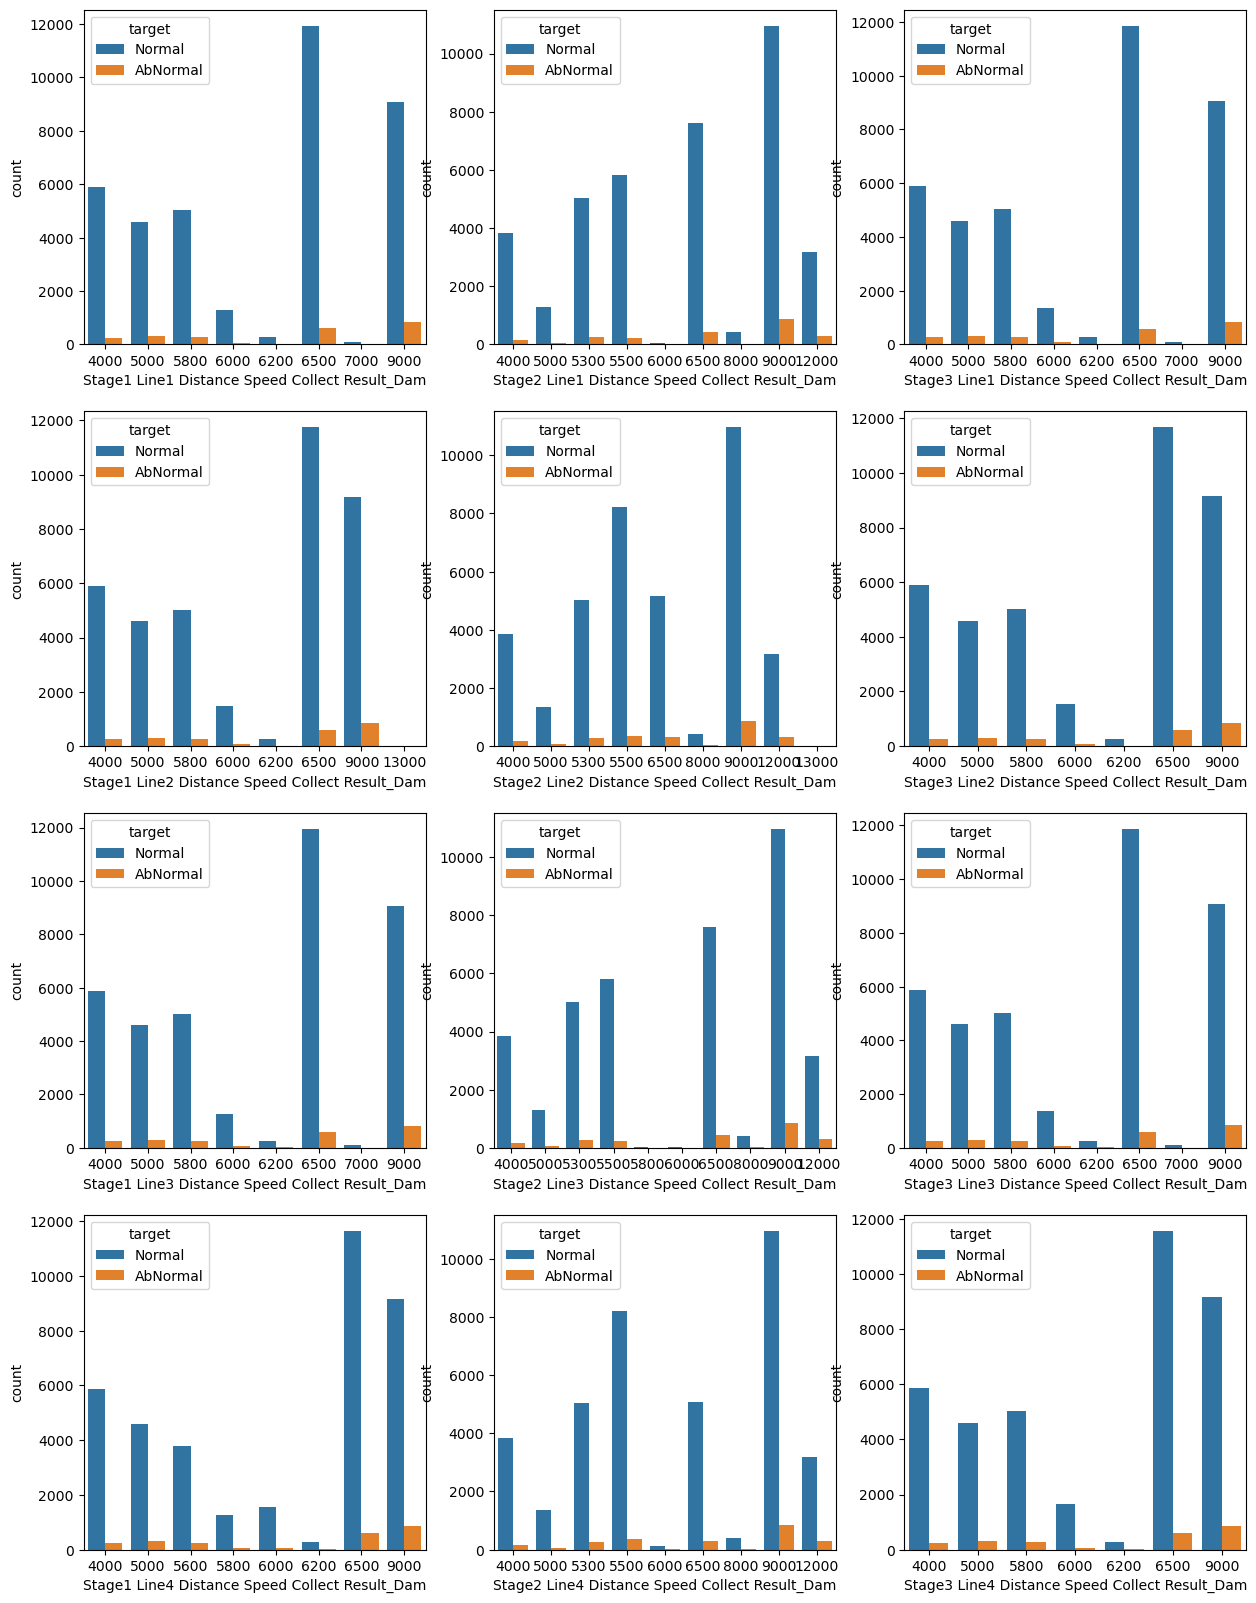

In [29]:
#Line 1,2,3,4

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 20))

sns.countplot(x="Stage1 Line1 Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[0, 0]);
sns.countplot(x="Stage2 Line1 Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[0, 1]);
sns.countplot(x="Stage3 Line1 Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[0, 2]);

sns.countplot(x="Stage1 Line2 Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[1, 0]);
sns.countplot(x="Stage2 Line2 Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[1, 1]);
sns.countplot(x="Stage3 Line2 Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[1, 2]);

sns.countplot(x="Stage1 Line3 Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[2, 0]);
sns.countplot(x="Stage2 Line3 Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[2, 1]);
sns.countplot(x="Stage3 Line3 Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[2, 2]);

sns.countplot(x="Stage1 Line4 Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[3, 0]);
sns.countplot(x="Stage2 Line4 Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[3, 1]);
sns.countplot(x="Stage3 Line4 Distance Speed Collect Result_Dam", hue="target", data=df, ax=axes[3, 2]);

In [31]:
#line 2,3,4만 grouping 가능한건지 확인해본건데...circle에 비해서는 약해

CL_df[["Stage1 Line2 Distance Speed Collect Result_Dam", "Stage1 Line3 Distance Speed Collect Result_Dam", "Stage1 Line4 Distance Speed Collect Result_Dam"]].value_counts()

Stage1 Line2 Distance Speed Collect Result_Dam  Stage1 Line3 Distance Speed Collect Result_Dam  Stage1 Line4 Distance Speed Collect Result_Dam
6500                                            6500                                            6500                                              12042
9000                                            9000                                            9000                                               9901
4000                                            4000                                            4000                                               6138
5000                                            5000                                            5000                                               4901
5800                                            5800                                            5600                                               3999
6000                                            6000                                            6

In [32]:
CL_df[["Stage1 Line1 Distance Speed Collect Result_Dam", "Stage1 Line2 Distance Speed Collect Result_Dam", "Stage1 Line3 Distance Speed Collect Result_Dam", "Stage1 Line4 Distance Speed Collect Result_Dam"]].value_counts()

Stage1 Line1 Distance Speed Collect Result_Dam  Stage1 Line2 Distance Speed Collect Result_Dam  Stage1 Line3 Distance Speed Collect Result_Dam  Stage1 Line4 Distance Speed Collect Result_Dam
6500                                            6500                                            6500                                            6500                                              12042
9000                                            9000                                            9000                                            9000                                               9901
4000                                            4000                                            4000                                            4000                                               6138
5000                                            5000                                            5000                                            5000                                               4901
5800     

2. Thickness

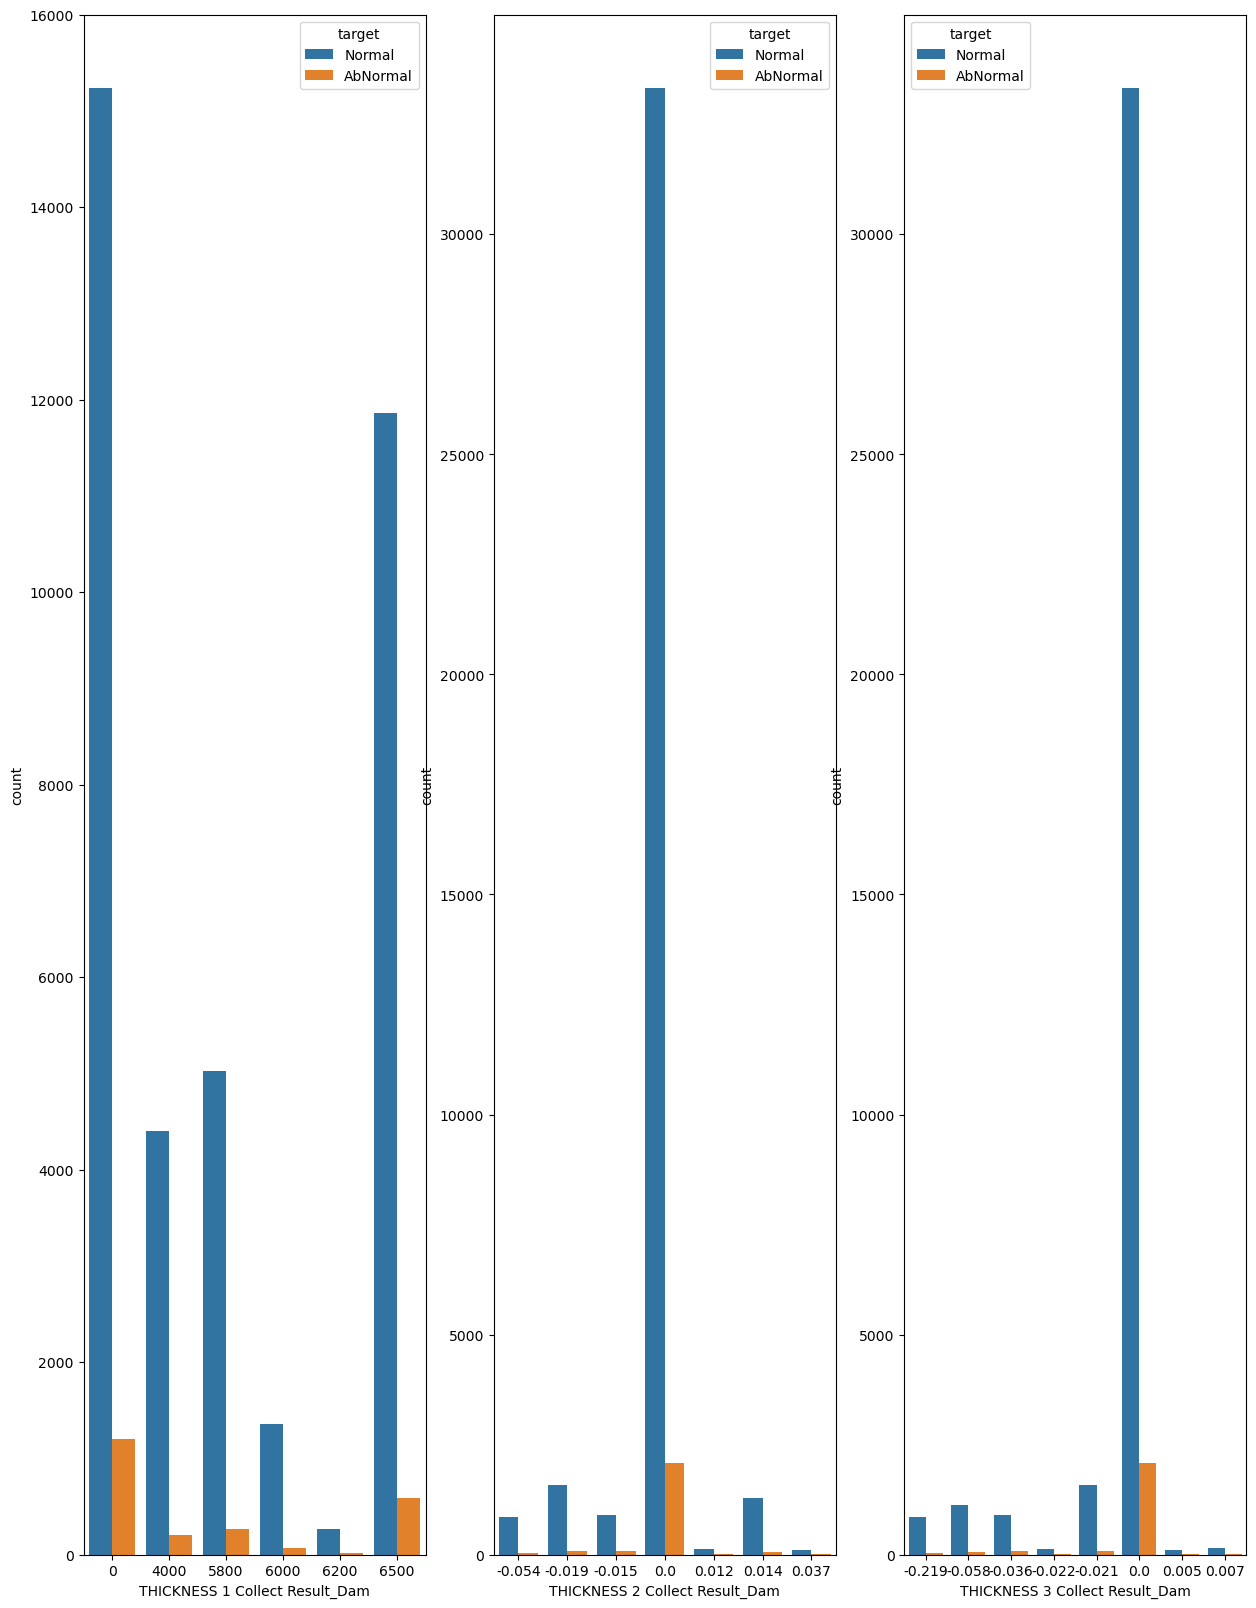

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 20))

sns.countplot(x="THICKNESS 1 Collect Result_Dam", hue="target", data=df, ax=axes[0]);
sns.countplot(x="THICKNESS 2 Collect Result_Dam", hue="target", data=df, ax=axes[1]);
sns.countplot(x="THICKNESS 3 Collect Result_Dam", hue="target", data=df, ax=axes[2]);

In [28]:
df[["THICKNESS 1 Collect Result_Dam", "THICKNESS 2 Collect Result_Dam", "THICKNESS 3 Collect Result_Dam"]].corr()

,THICKNESS 1 Collect Result_Dam,THICKNESS 2 Collect Result_Dam,THICKNESS 3 Collect Result_Dam
THICKNESS 1 Collect Result_Dam,1.000000,-0.152733,-0.208311
THICKNESS 2 Collect Result_Dam,-0.152733,1.000000,0.774589
THICKNESS 3 Collect Result_Dam,-0.208311,0.774589,1.000000
